# *Data Science Salaries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

Carichiamo i dati:

In [2]:
try:
    data = pd.read_csv('ds_salaries.csv')
except FileNotFoundError:
    print("File ds_salaries.csv non trovato.")
    sys.exit()

Mostriamo le prime 10 righe del nostro file:

In [3]:
data.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


Abbiamo calcolato i parametri statistici per stipendio annuo (USD): media, quartile, minimo e massimo. 

In [4]:
data.describe()['salary_in_usd']

count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64

In [5]:
print('Stipendio annuo minimo:', data.salary_in_usd.min(), ', stipendio annuo massimo', data.salary_in_usd.max())

Stipendio annuo minimo: 5132 , stipendio annuo massimo 450000


# *Rappresentazione dei boxplot relativi alle singole categorie di esperienza lavorativa*

Ci sono 4 livelli di esperienza, che sono:

* EN, che si riferisce a Entry-level / Junior.

* MI, che si riferisce a Mid-level / Intermediate.

* SE, che si riferisce a Senior-level / Expert.

* EX, che si riferisce a Executive-level / Director.

Text(0, 0.5, 'Reddito annuo (USD)')

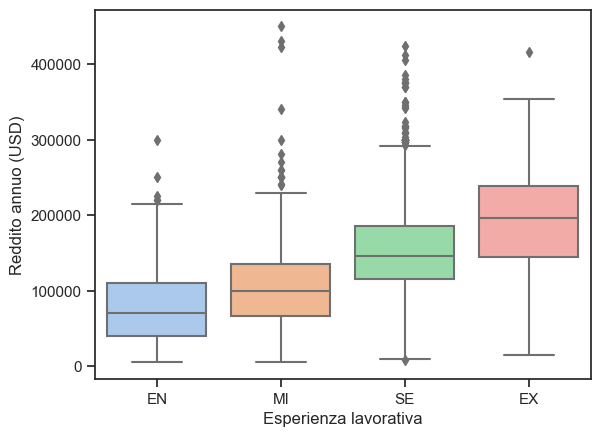

In [6]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, x='experience_level', y='salary_in_usd', order=['EN','MI','SE','EX'])
plt.xlabel('Esperienza lavorativa')
plt.ylabel('Reddito annuo (USD)')

# *Distribuzione dei redditi annuali basata sul livello di esperienza degli impiegati*

Text(0, 0.5, 'Numero di impiegati')

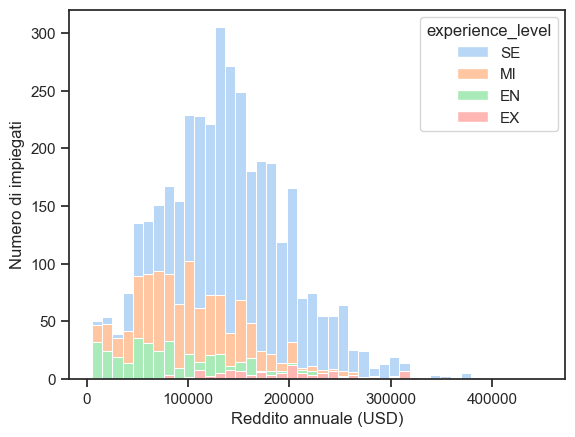

In [7]:
ax=sns.histplot(data=data, x = 'salary_in_usd', color='pink', hue='experience_level', multiple='stack')
plt.xlabel('Reddito annuale (USD)')
plt.ylabel('Numero di impiegati')

# *Rappresentazione dei boxplot relativi ai tipi di contratto*

Ci sono 4 tipi di impiego (cioè di contratto):

PT : Part-time

FT : Full-time

CT : Contract

FL : Freelance

Text(0.5, 0, 'Tipologia di contratto')

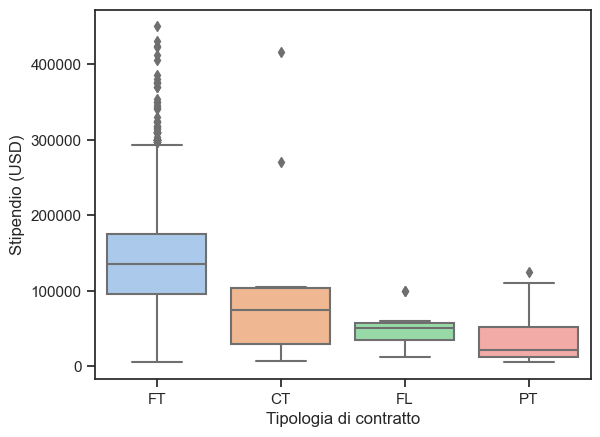

In [8]:
sns.set_theme(style="ticks", palette="pastel")
sns.boxplot(data=data, x='employment_type', y='salary_in_usd')
plt.ylabel('Stipendio (USD)')
plt.xlabel('Tipologia di contratto')

# *Strip plot rappresentativo della distribuzione dei redditi annui in base al livello di esperienza degli impiegati e alle dimensioni delle società*

Text(0.5, 0, 'Dimensioni della società')

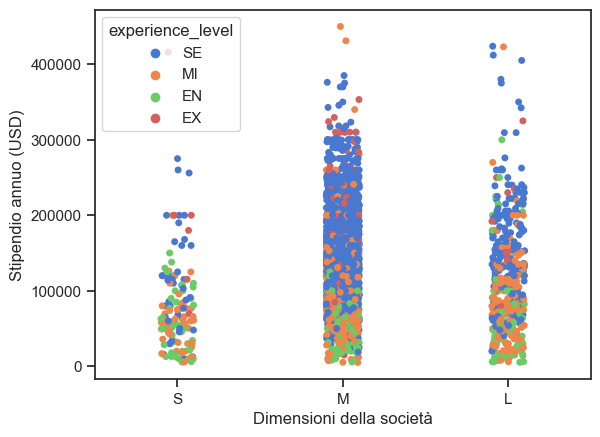

In [9]:

sns.stripplot(data=data, x='company_size', y='salary_in_usd', hue='experience_level', palette = 'muted', order=['S', 'M', 'L'])
plt.ylabel('Stipendio annuo (USD)')
plt.xlabel('Dimensioni della società')


# *Impatto delle dimensioni della società sullo stipendio annuo*

Le società di medie dimensioni tendono ad offrire gli stipendi medi annui più alti, suggerendo un equilibrio ottimale tra risorse e flessibilità rispetto alle società di dimensioni più grandi o più piccole.

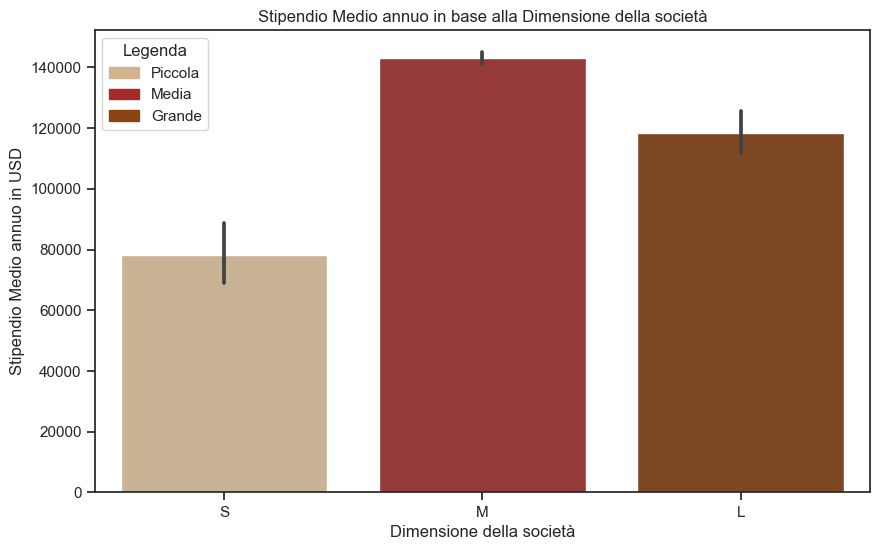

In [10]:
colors_five = sfumature_di_marrone_chiaro = sfumature_di_marrone = ['#D2B48C', '#A52A2A', '#8B4513']
plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=data, palette=colors_five, order=['S', 'M', 'L'])
plt.title('Stipendio Medio annuo in base alla Dimensione della società')
plt.xlabel('Dimensione della società')
plt.ylabel('Stipendio Medio annuo in USD')
legend_labels = ['Piccola', 'Media', 'Grande']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_five[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=2)
plt.show()


# *Grafico a torta che mostra le percentuali riferite alle tipologie di contratti*

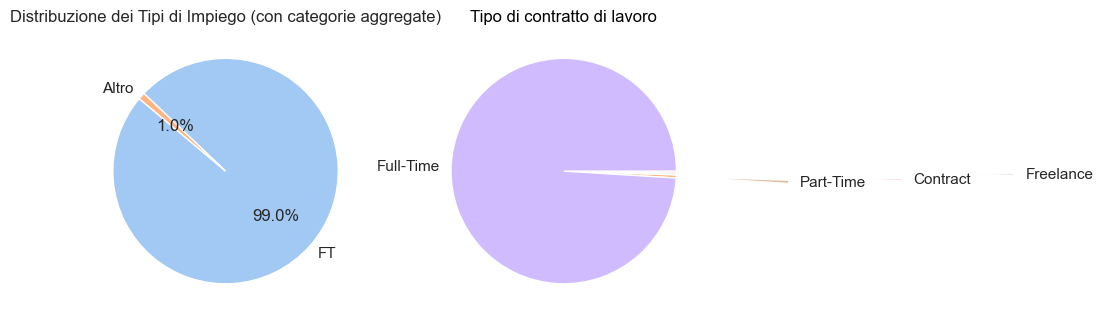

In [11]:
plt.subplot(1, 2, 2)
group = data['employment_type'].value_counts()
plt.pie(group)
etichette = ['Full-Time', 'Part-Time', 'Contract', 'Freelance']
plt.pie(group, labels=etichette, explode=[0,1,2,3])
plt.title('Tipo di contratto di lavoro', color = 'black')

plt.subplot(1, 2, 1)
grouped_data = data.groupby(['employment_type', 'company_size']).size().unstack().fillna(0)
employment_type_totals = grouped_data.sum(axis=1)
grouped_totals = employment_type_totals.copy()
grouped_totals['Altro'] = grouped_totals['CT'] + grouped_totals['FL'] + grouped_totals['PT']
grouped_totals = grouped_totals.drop(['CT', 'FL', 'PT'])
grouped_percentages = grouped_totals / grouped_totals.sum() * 100
grouped_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=140, figsize=(8, 8))
plt.title('Distribuzione dei Tipi di Impiego (con categorie aggregate)')
plt.ylabel('')  # Nascondere l'etichetta dell'asse y

plt.show()

Nel grafico "Distribuzione dei Tipi di Impiego (con categorie aggregate)": "Altro" si riferisce alla somma di Part-Time, Contract e Free

# *Grafico a torta relativo al livello di esperienza sul totale degli impiegati*

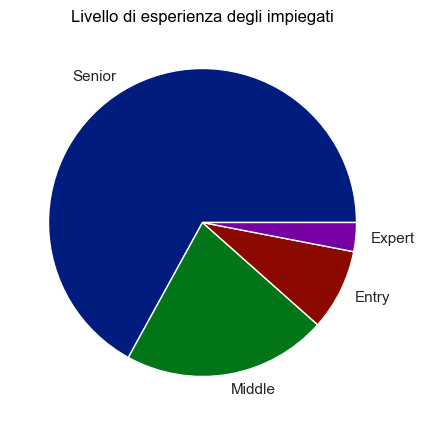

In [12]:
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams['figure.figsize'] = [10, 5]
etichette = ['Senior', 'Middle', 'Entry', 'Expert']
seniority=data['experience_level'].value_counts()
plt.pie(seniority, labels=etichette)
plt.title('Livello di esperienza degli impiegati', color = 'black')
plt.show()

# *Variazione temporale degli stipendi annui in base al livello di esperienza (solo lavoratori full-time)*

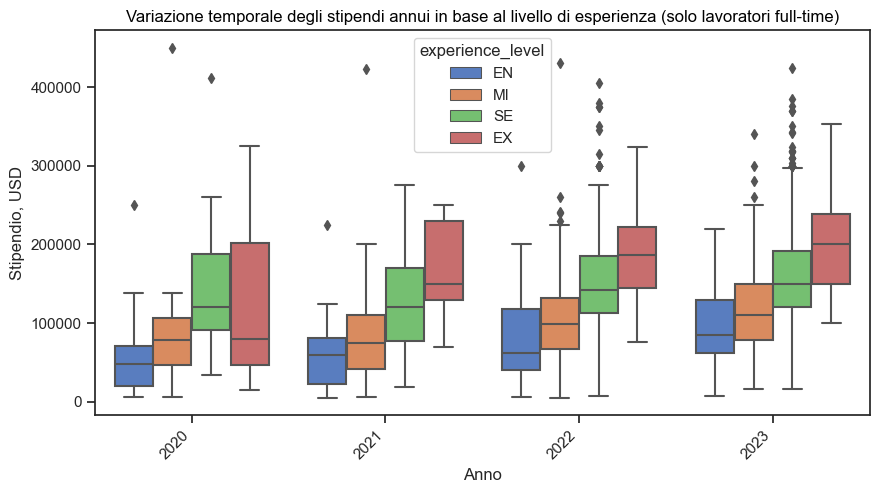

In [13]:
sns.boxplot(data=data[data['employment_type']=='FT'], x='work_year', y='salary_in_usd', hue = 'experience_level', palette='muted', hue_order=['EN','MI','SE','EX'])
plt.xticks(rotation=45, ha ='right')
plt.xlabel('Anno')
plt.ylabel('Stipendio, USD')
plt.title('Variazione temporale degli stipendi annui in base al livello di esperienza (solo lavoratori full-time)', color = 'black')
plt.show()

# *Numero di impiegati per ciascun ruolo (primi 15)*

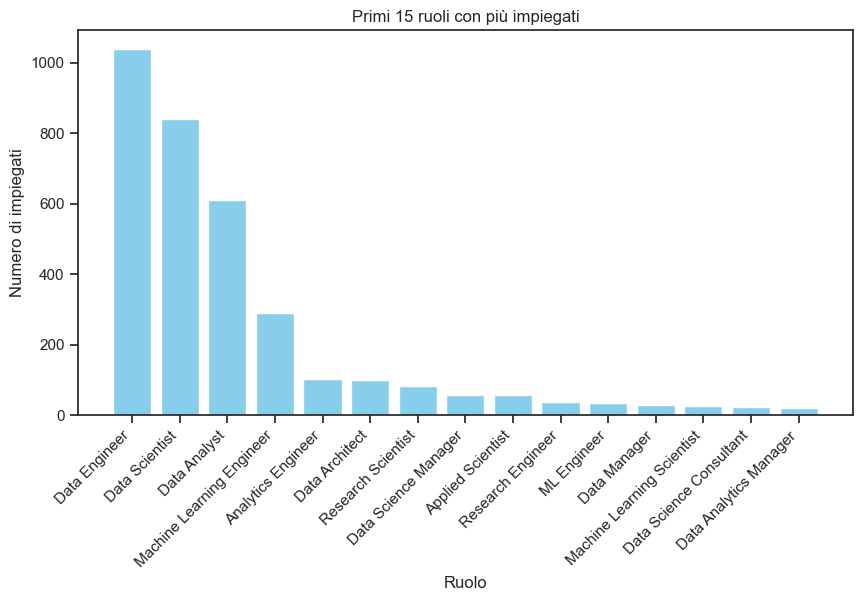

In [14]:
top15_job_titles = data['job_title'].value_counts()[:15]

plt.bar(top15_job_titles.index, top15_job_titles.values, color='skyblue')
plt.title('Primi 15 ruoli con più impiegati')
plt.xlabel('Ruolo')
plt.ylabel('Numero di impiegati')

plt.xticks(rotation=45, ha='right')
plt.show()

# *Confronto tra luogo di residenza degli impiegati e la posizione della società*

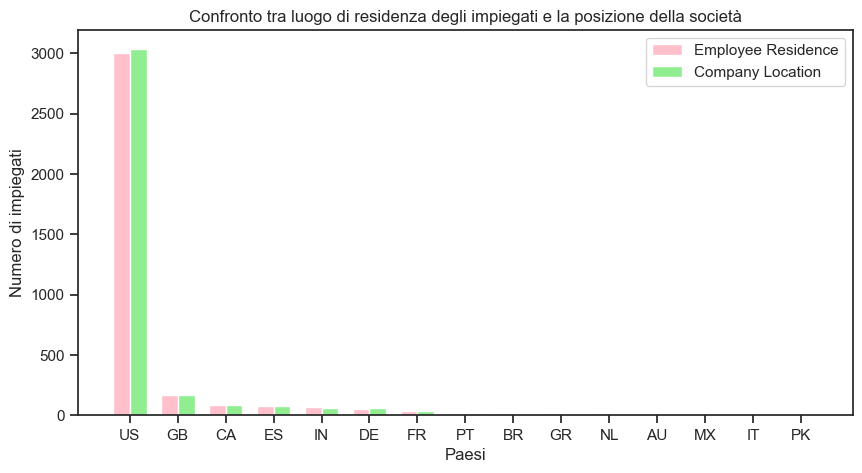

In [15]:
top_15_residence = data['employee_residence'].value_counts()[:15]

top_15_company_location = data['company_location'].value_counts()[:15]

bar_width = 0.35
index = np.arange(len(top_15_residence.index))

fig, ax = plt.subplots()

bar1 = ax.bar(index, top_15_residence.values, bar_width, label='Employee Residence', color='pink')
bar2 = ax.bar(index + bar_width, top_15_company_location.values, bar_width, label='Company Location', color='lightgreen')

ax.set_xlabel('Paesi')
ax.set_ylabel('Numero di impiegati')
ax.set_title('Comparison of Employee Residence and Company Location')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_15_residence.index)
ax.legend()

plt.title('Confronto tra luogo di residenza degli impiegati e la posizione della società')
plt.show()

# *Grafico a barre per le top 3 figure lavorative*

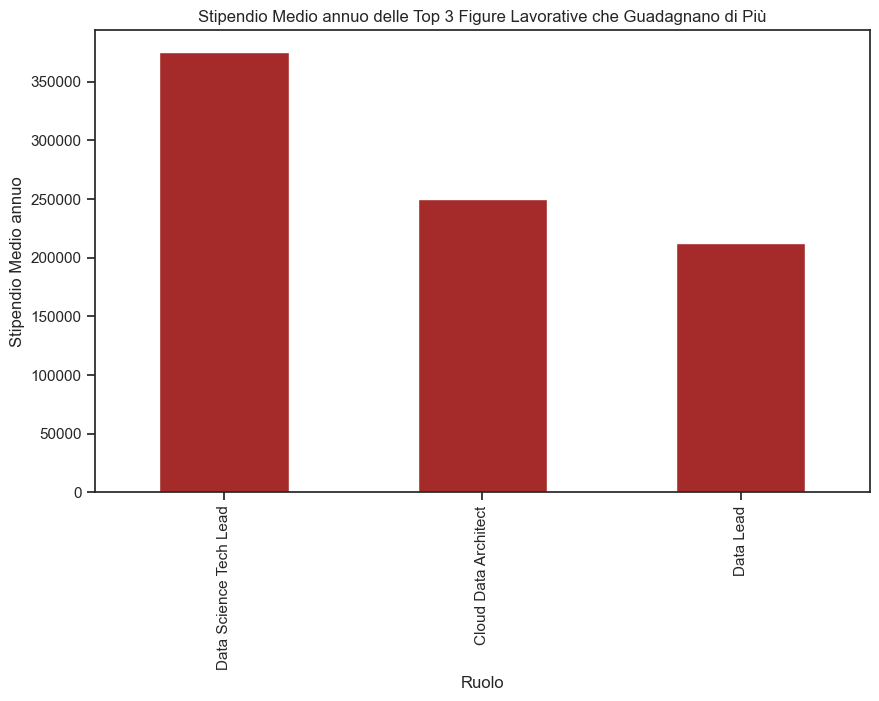

In [16]:
media_stipendi_per_figura_lavorativa = data.groupby('job_title')['salary_in_usd'].mean()
figure_top3 = media_stipendi_per_figura_lavorativa.nlargest(3)
plt.figure(figsize=(10, 6))
figure_top3.plot(kind='bar', color='brown')
plt.title('Stipendio Medio annuo delle Top 3 Figure Lavorative che Guadagnano di Più')
plt.xlabel('Ruolo')
plt.ylabel('Stipendio Medio annuo')
plt.show()

# *Influenza del Livello di Esperienza sul reddito medio annuo*

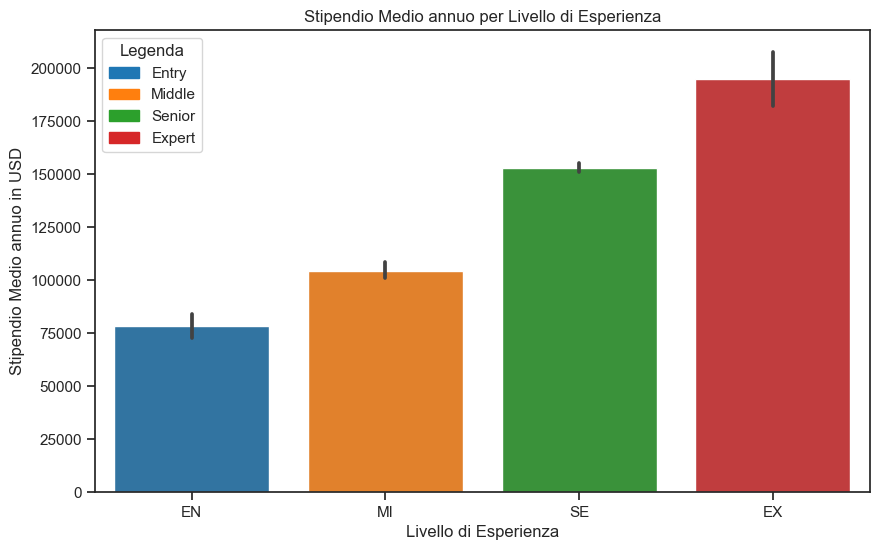

In [17]:
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=data, palette=colors, order=['EN','MI','SE','EX'])
plt.title('Stipendio Medio annuo per Livello di Esperienza')
plt.xlabel('Livello di Esperienza')
plt.ylabel('Stipendio Medio annuo in USD')
legend_labels = ['Entry', 'Middle', 'Senior','Expert']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=2)
plt.show()


# *Grafico che mostra l'andamento dei redditi medi annuali nel tempo*

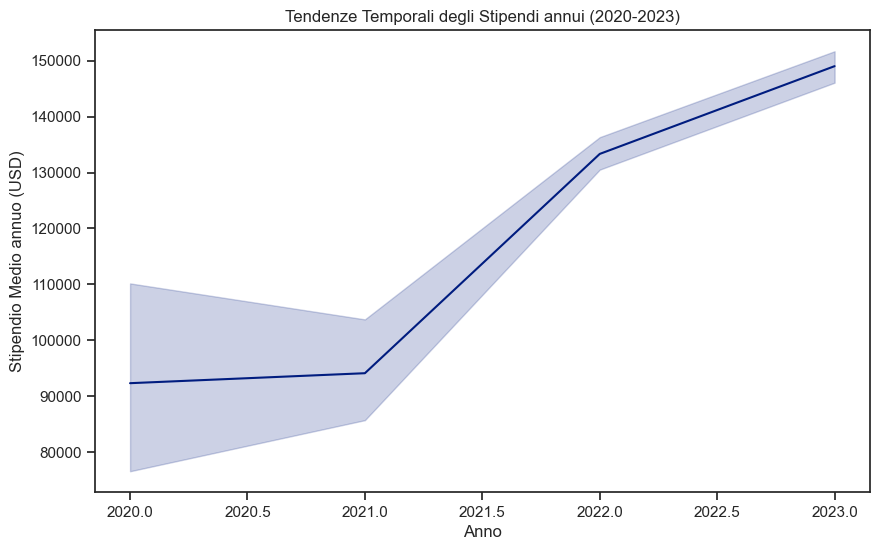

In [18]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=data)
plt.title('Tendenze Temporali degli Stipendi annui (2020-2023)')
plt.xlabel('Anno')
plt.ylabel('Stipendio Medio annuo (USD)')
plt.show()

# *Grafico che mostra lo stipendio annuo in base alla modalità di lavoro*

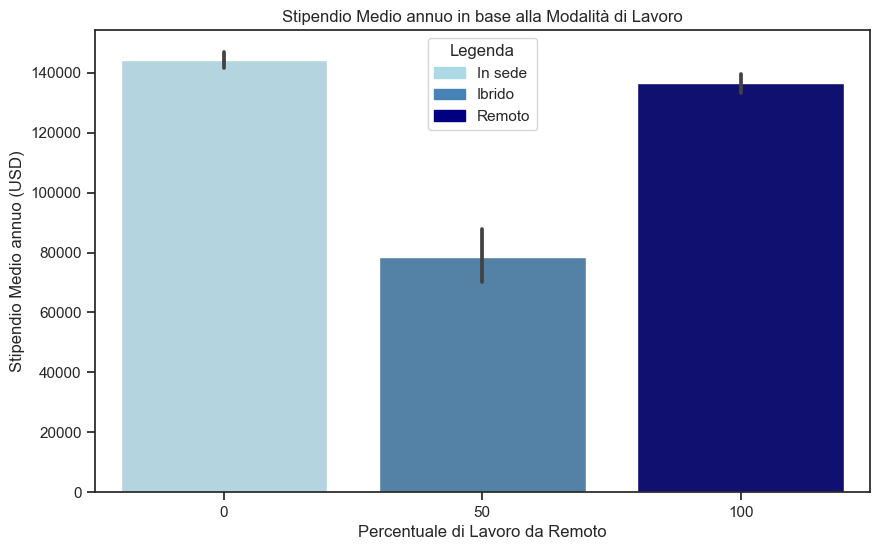

In [19]:
colors_three = shades_of_blue = ['#ADD8E6', '#4682B4', '#000080']
plt.figure(figsize=(10, 6))
sns.barplot(x='remote_ratio', y='salary_in_usd', data=data, palette=colors_three)
plt.title('Stipendio Medio annuo in base alla Modalità di Lavoro')
plt.xlabel('Percentuale di Lavoro da Remoto')
plt.ylabel('Stipendio Medio annuo (USD)')
legend_labels = ['In sede', 'Ibrido', 'Remoto']
legend_handles = [plt.Rectangle((0,0),1,1, color=colors_three[i], label=label) for i, label in enumerate(legend_labels)]
plt.legend(handles=legend_handles, title='Legenda', loc=9)
plt.show()

# *Grafico a barre orizzontali che rappresenta gli stipendi medi annui per i primi 10 ruoli professionali*

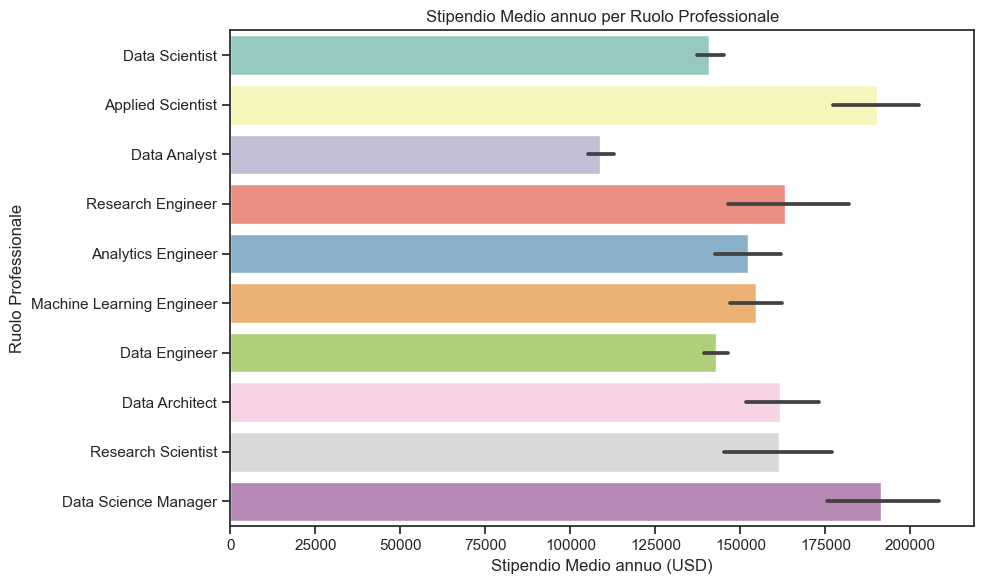

In [20]:
top_roles = data['job_title'].value_counts().head(10).index

plt.figure(figsize=(10, 6))
ax = sns.barplot(y='job_title', x='salary_in_usd', data=data[data['job_title'].isin(top_roles)], palette = sns.color_palette("Set3"))
plt.title('Stipendio Medio annuo per Ruolo Professionale')
plt.xlabel('Stipendio Medio annuo (USD)')
plt.ylabel('Ruolo Professionale')
plt.tight_layout()

plt.show()